# Import Dependincies

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.layers import Dense,Dropout,Input
from tensorflow.keras.callbacks import EarlyStopping

# Load Data

In [31]:
train_df=pd.read_csv("./train.csv")
test_df=pd.read_csv("./test.csv")

train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
train_df.shape

(42000, 785)

In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [34]:
train_df['label'].value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

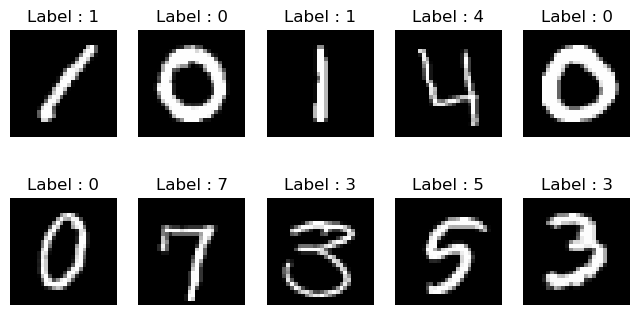

In [35]:
x=train_df.drop('label',axis=1).values
y=train_df['label'].values

plt.figure(figsize=(8,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x[i].reshape(28,28),cmap='gray')
    plt.title(f'Label : {y[i]}')
    plt.axis('off')
plt.show()

# Data Preprocessing

In [37]:
x=train_df.drop('label',axis=1).values
y=train_df['label'].values

x.shape,y.shape

((42000, 784), (42000,))

In [38]:
x=x/255.0
x=x.reshape(-1,28,28,1)
x_test_final=test_df.values/255.0
x_test_final=x_test_final.reshape(-1,28,28,1)

x_test_final.shape

(28000, 28, 28, 1)

In [39]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val=train_test_split(
    x,y,
    test_size=0.1,
    random_state=42,
    stratify=y
)
x_train.shape,x_val.shape

((37800, 28, 28, 1), (4200, 28, 28, 1))

In [40]:
np.bincount(y_train)

array([3719, 4216, 3759, 3916, 3665, 3415, 3723, 3961, 3657, 3769])

In [41]:
np.bincount(y_val)

array([413, 468, 418, 435, 407, 380, 414, 440, 406, 419])

# CNN Model Training

In [43]:
cnn_model=Sequential([
    Input(shape=(28,28,1)),

    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),

    Dense(128,activation='relu'),
    Dropout(0.3),

    Dense(10,activation='softmax')
])

In [44]:
cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [45]:
early_stop=EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [46]:
history=cnn_model.fit(
    x_train,y_train,
    validation_data=(x_val,y_val),
    epochs=15,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/15
296/296 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9068 - loss: 0.3040 - val_accuracy: 0.9662 - val_loss: 0.1023
Epoch 2/15
296/296 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.9731 - loss: 0.0875 - val_accuracy: 0.9788 - val_loss: 0.0737
Epoch 3/15
296/296 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9811 - loss: 0.0624 - val_accuracy: 0.9860 - val_loss: 0.0513
Epoch 4/15
296/296 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9847 - loss: 0.0482 - val_accuracy: 0.9857 - val_loss: 0.0486
Epoch 5/15
296/296 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9875 - loss: 0.0400 - val_accuracy: 0.9848 - val_loss: 0.0503
Epoch 6/15
296/296 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9897 - loss: 0.0336 - val_accuracy: 0.9883 - val_loss: 0.0415
Epoch 7/15
296/296 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9901 - loss: 0.0300 - val_accuracy: 0.9895 - val_loss: 0.0379
Epoch 8/15
296/296 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9922 - loss: 0.0257 - val_accu

In [47]:
val_loss, val_accuracy = cnn_model.evaluate(x_val, y_val)
print("Validation Accuracy:", val_accuracy)

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9895 - loss: 0.0379 
Validation Accuracy: 0.9895238280296326


In [48]:
test_prediction=cnn_model.predict(x_test_final)
test_labels=np.argmax(test_prediction,axis=1)

test_labels[:10]

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([2, 0, 9, 9, 3, 7, 0, 3, 0, 3])

# Create Submission

In [49]:
submission=pd.DataFrame({
    "ImageId":np.arange(1,len(test_labels)+1),
    "Label":test_labels
})
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [51]:
submission.to_csv('submission.csv',index=False)